In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
fpp_all = pd.read_csv('fpp_final_table.csv', index_col=0)
fpp_all.count()

koi.1                    7470
rprs                     7202
secthresh                7202
maxrad                   7202
pr_heb                   7048
pr_heb_Px2               7048
pr_eb                    7048
pr_eb_Px2                7048
pr_beb                   7048
pr_beb_Px2               7048
L_tot                    7052
fp                       7052
FPP                      7048
kepid                    7470
period                   7470
rp                       7128
disposition              7470
prob_ontarget            6790
pos_prob_score           7470
not_transitlike          7470
significant_secondary    7470
centroid_offset          7470
ephem_match              7470
MES                      7470
exception                 418
has_ttv                  7268
n_cands                  7470
dtype: int64

(980, 264, 55)
(50, 9)


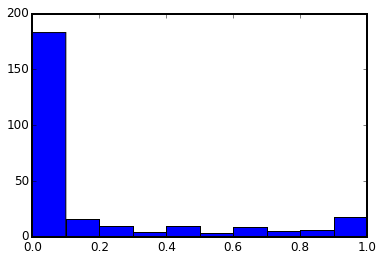

In [2]:
import matplotlib.pyplot as plt

pem = fpp_all.ephem_match 
other_fp = ((fpp_all.disposition == 'FALSE POSITIVE') & 
            (fpp_all.not_transitlike | fpp_all.centroid_offset | 
                                     fpp_all.significant_secondary))
score_ok = fpp_all.pos_prob_score > 0.3
pos_ok = fpp_all.prob_ontarget > 0.99
ok = fpp_all.L_tot > 1e-3
lo_fpp = fpp_all.FPP < 0.01
plt.hist(fpp_all[pem & pos_ok].pos_prob_score)
print(sum(pem),sum(pem & pos_ok), sum(pem & pos_ok & score_ok))
print(sum(pem & pos_ok & score_ok & ok), sum(pem & pos_ok & score_ok & ok & lo_fpp))

In [7]:
print(pem & ~other_fp).sum()
print(sum(pem & pos_ok & score_ok & ~other_fp & ok), sum(pem & ~other_fp & pos_ok & score_ok & ok & lo_fpp))

187
(18, 4)


So.  Out of 980 PEMs, 187 were not found by any other method.  Only 18 of these 187 survived the quality cuts (APP, APP_score, and L_tot).  And of these 18, only 4 have low FPP (<1%).  

Thus, we expect only 4/980 = 0.4% of unidentified PEMs to end up as validated. As the total rate of PEMs is estimate to be something around 30%, there remains a small (~0.1% chance) that any of the validated planets may turn out to be column anomalies or the like.

In [3]:
sum(pem & (fpp_all.prob_ontarget==0))

325

In [4]:
q = 'pos_prob_score > 0.3 and L_tot > 1e-3 and prob_ontarget > 0.99 and ephem_match==1'
q2 = 'ephem_match==1'
print len(fpp_all.query(q))
print len(fpp_all.query(q2))
fpp_all.query(q)[['FPP','pos_prob_score','period','L_tot']]

50
980


,FPP,pos_prob_score,period,L_tot
koi,,,,
K01167.01,1.000000,0.64,0.445275,0.290100
K01699.01,1.000000,1.00,2.253554,0.069990
K02233.01,1.000000,1.00,1.811457,0.021390
K02769.01,1.000000,1.00,1.480324,0.760300
K03240.01,1.000000,1.00,1.245326,0.497100
K03243.01,1.000000,0.88,8.429413,12.000000
K03249.01,1.000000,1.00,0.918424,0.018780
K03498.01,1.000000,1.00,43.798226,1.344000
K03968.01,1.000000,0.78,1.506502,0.044630
